In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv('1213moist.csv')

df

,Zone,Sample Date,Dataset,Moisture (Avg) (%),Moisture (Min) (%),Moisture (Max) (%)
0,12 Green,2024-08-12 11:44:00,1,25.9,15,34
1,18 Green,2024-08-12 11:49:33,1,22.2,12,27
2,01 Green,2024-08-12 11:53:20,1,22.7,13,34
3,17 Green,2024-08-12 12:01:36,1,25.9,19,37
4,13 Green,2024-08-12 12:05:25,1,21.5,17,26
5,14 Green,2024-08-12 12:10:20,1,21.8,17,33
6,15 Green,2024-08-12 12:14:53,1,24.2,15,36
7,10 Green,2024-08-12 12:22:04,1,24.9,14,36
8,04 Green,2024-08-13 10:09:58,1,26.3,17,33
9,12 Green,2024-08-13 10:14:00,1,24.8,18,33


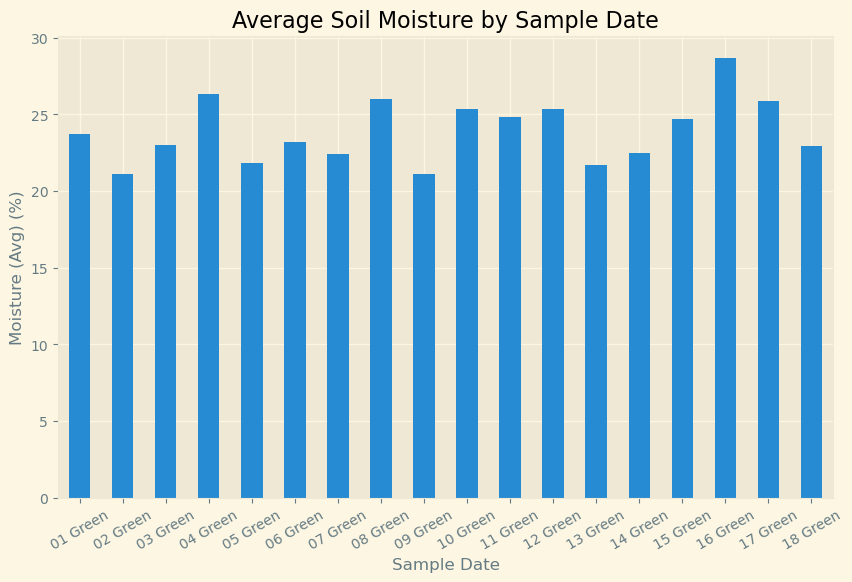

In [3]:
grouped_df = df.groupby('Zone')[['Moisture (Avg) (%)']].mean()

# Plotting the bar chart
grouped_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Average Soil Moisture by Sample Date')
plt.xlabel('Sample Date')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=30)
plt.show()

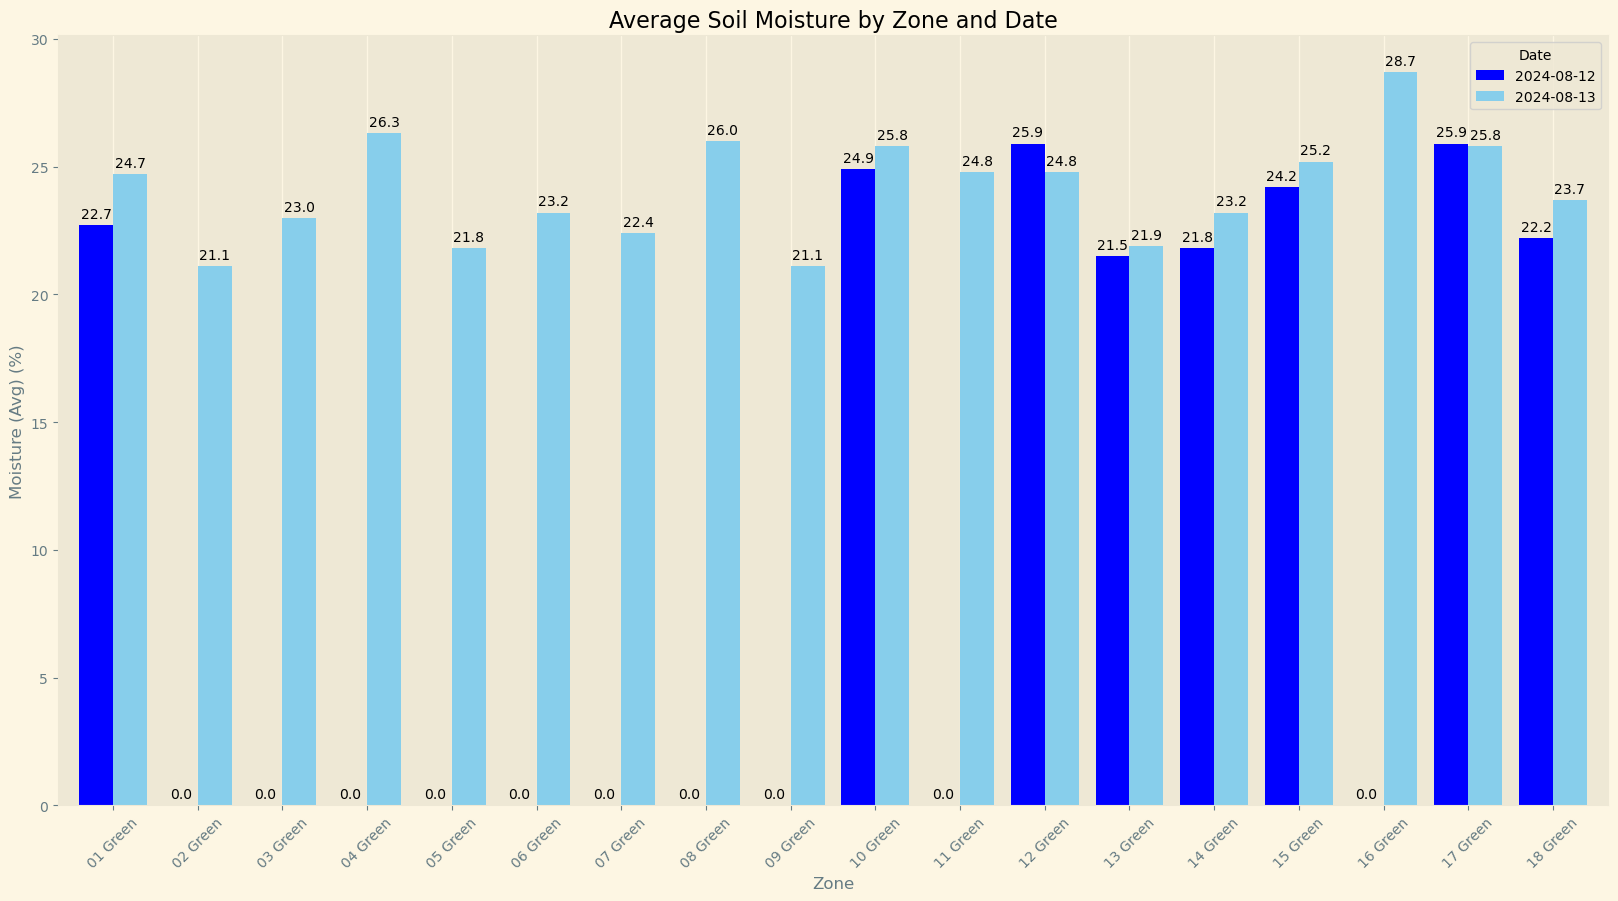

In [4]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.legend(title='Date')
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')


# Display the plot
plt.show()

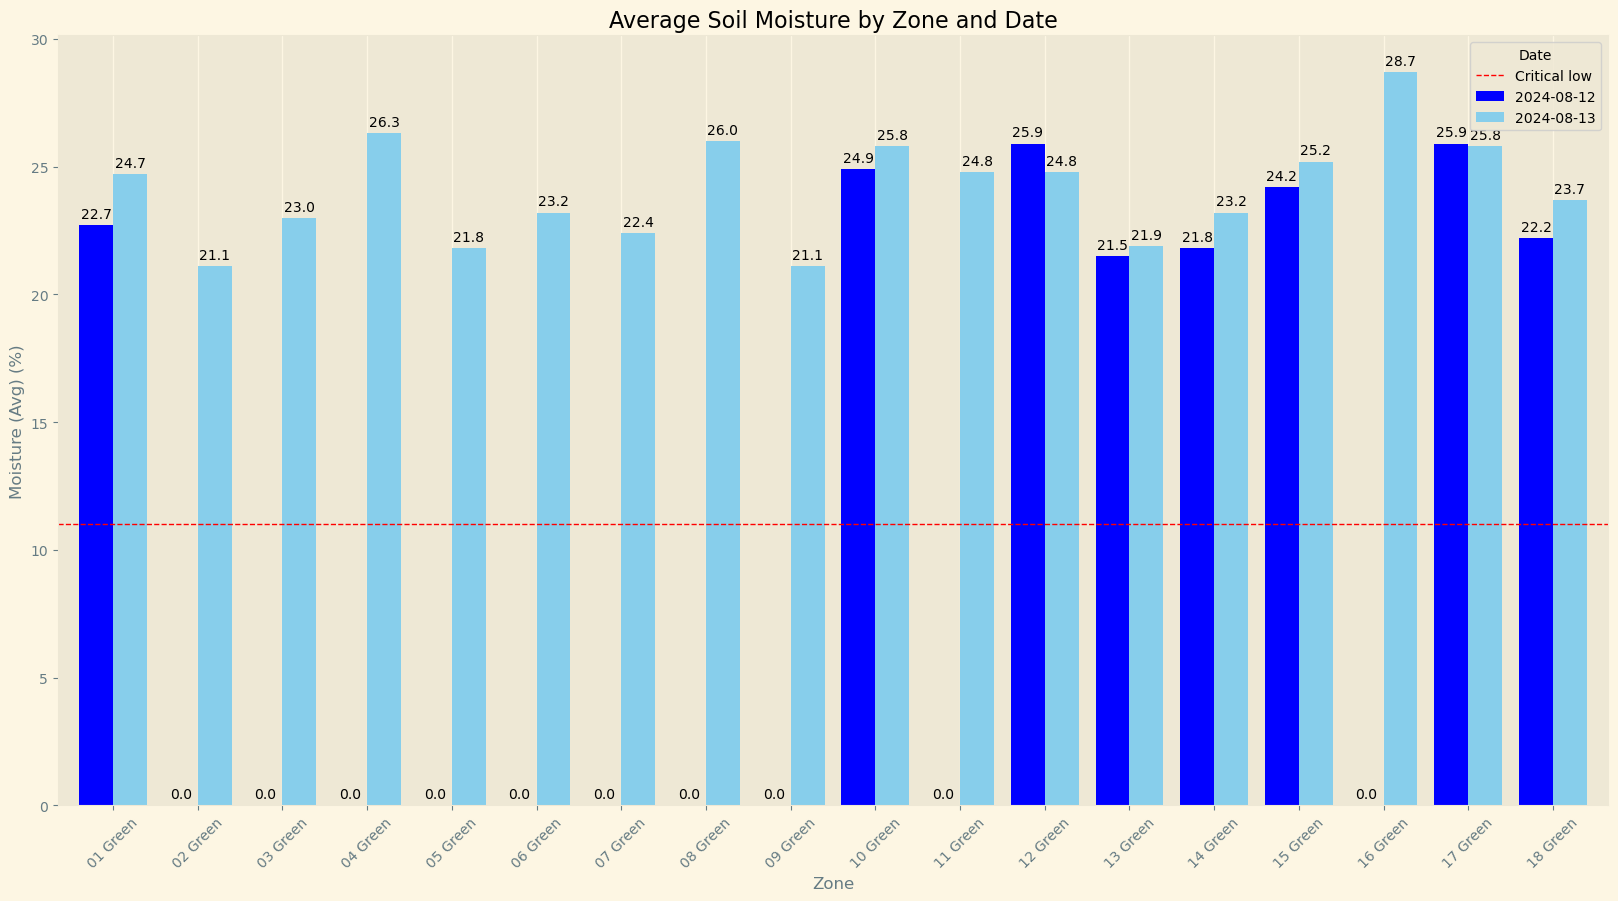

In [5]:
# Convert 'Sample Date' to datetime
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding legend with the red dotted line
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles, title='Date')

# Display the plot
plt.show()

In [6]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Calculate the percentage difference
date_columns = grouped_df.columns
if len(date_columns) == 2:
    grouped_df['Difference (%)'] = grouped_df[date_columns[1]] - grouped_df[date_columns[0]]

# Renaming columns to add "Moisture Avg (%)"
grouped_df.columns = [f'{col} Moisture Avg (%)' if col != 'Difference (%)' else col for col in grouped_df.columns]

grouped_df

,2024-08-12 Moisture Avg (%),2024-08-13 Moisture Avg (%),Difference (%)
Zone,,,
01 Green,22.7,24.7,2.0
02 Green,NaN,21.1,NaN
03 Green,NaN,23.0,NaN
04 Green,NaN,26.3,NaN
05 Green,NaN,21.8,NaN
06 Green,NaN,23.2,NaN
07 Green,NaN,22.4,NaN
08 Green,NaN,26.0,NaN
09 Green,NaN,21.1,NaN


In [7]:
df.head()

,Zone,Sample Date,Dataset,Moisture (Avg) (%),Moisture (Min) (%),Moisture (Max) (%),Date
0,12 Green,2024-08-12 11:44:00,1,25.9,15,34,2024-08-12
1,18 Green,2024-08-12 11:49:33,1,22.2,12,27,2024-08-12
2,01 Green,2024-08-12 11:53:20,1,22.7,13,34,2024-08-12
3,17 Green,2024-08-12 12:01:36,1,25.9,19,37,2024-08-12
4,13 Green,2024-08-12 12:05:25,1,21.5,17,26,2024-08-12


In [8]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
df.groupby(['Zone', 'Date'])['Moisture (Min) (%)'].mean().unstack()

Date,2024-08-12,2024-08-13
Zone,,
01 Green,13.0,14.0
02 Green,NaN,13.0
03 Green,NaN,18.0
04 Green,NaN,17.0
05 Green,NaN,16.0
06 Green,NaN,16.0
07 Green,NaN,17.0
08 Green,NaN,15.0
09 Green,NaN,13.0


In [9]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Min) (%)'].mean().unstack()

# Calculate the percentage difference
date_columns = grouped_df.columns
if len(date_columns) == 2:
    grouped_df['Difference (%)'] = grouped_df[date_columns[1]] - grouped_df[date_columns[0]]

# Renaming columns to add "Moisture Avg (%)"
grouped_df.columns = [f'{col} Moisture min (%)' if col != 'Difference (%)' else col for col in grouped_df.columns]

grouped_df

,2024-08-12 Moisture min (%),2024-08-13 Moisture min (%),Difference (%)
Zone,,,
01 Green,13.0,14.0,1.0
02 Green,NaN,13.0,NaN
03 Green,NaN,18.0,NaN
04 Green,NaN,17.0,NaN
05 Green,NaN,16.0,NaN
06 Green,NaN,16.0,NaN
07 Green,NaN,17.0,NaN
08 Green,NaN,15.0,NaN
09 Green,NaN,13.0,NaN


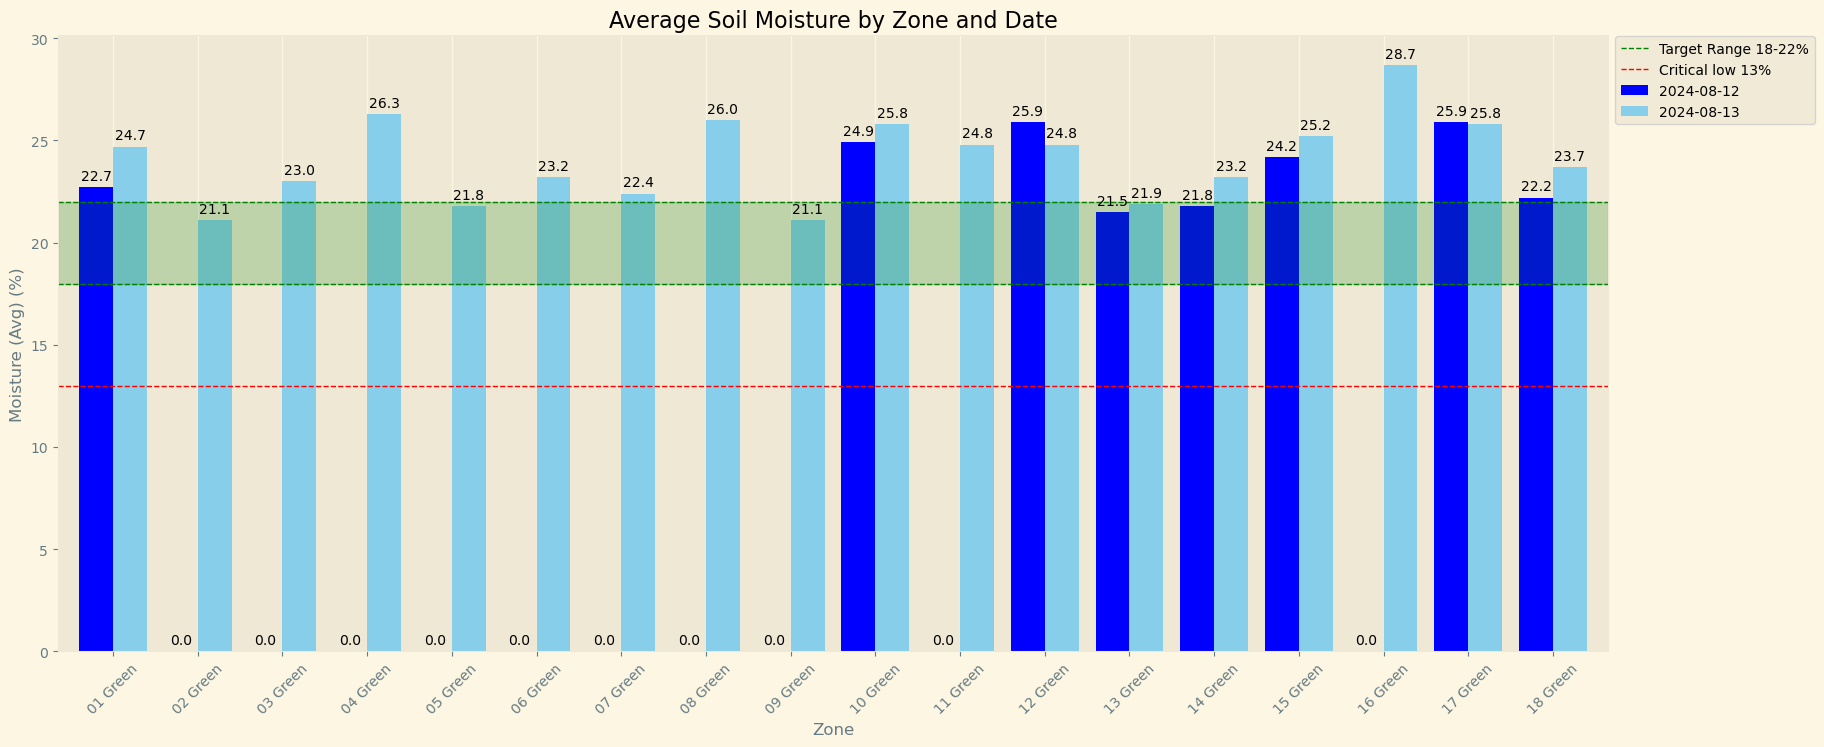

In [10]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Adding a red dotted line at 11%
plt.axhline(y=13, color='red', linestyle='--', linewidth=1, label='Critical low 13%')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

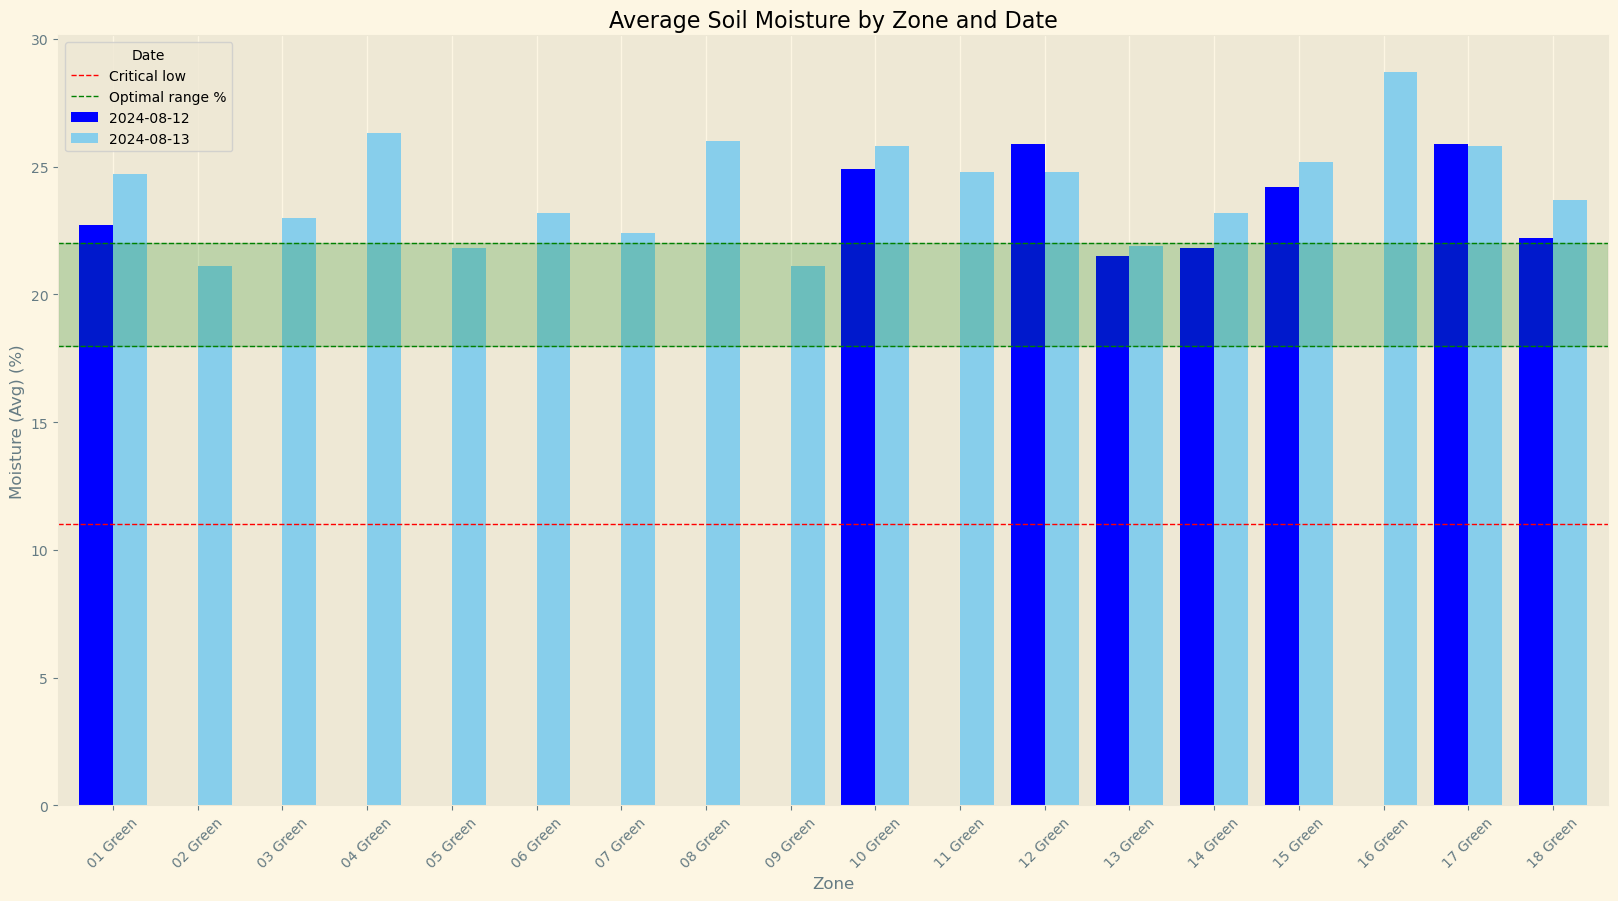

In [11]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations


# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Optimal range %')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date')

# Display the plot
plt.show()

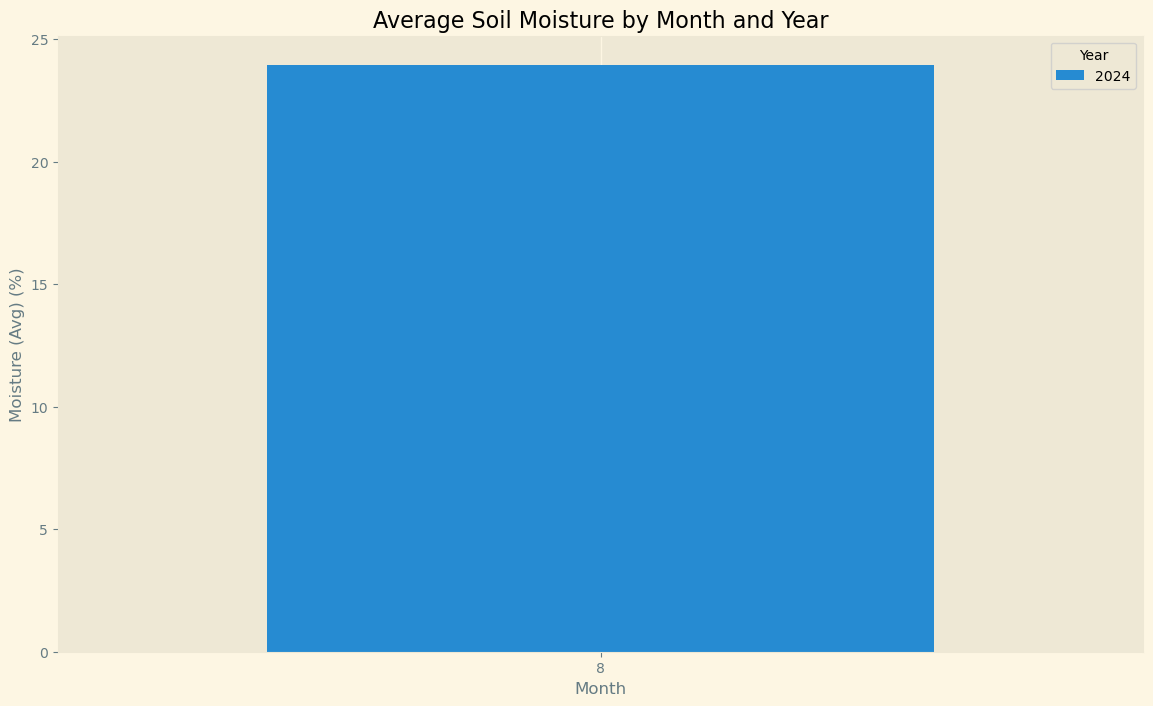

In [12]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract the month and year from 'Sample Date'
df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

# Calculate the average moisture percentage per month per year
monthly_avg_moisture = df.groupby(['Year', 'Month'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Transpose for better plotting
monthly_avg_moisture_transposed = monthly_avg_moisture.T

monthly_avg_moisture_transposed.plot(kind='bar', ax=ax, width=0.8)

plt.title('Average Soil Moisture by Month and Year')
plt.xlabel('Month')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Display the plot
plt.show()